# Project-2:

## California Housing Price Prediction

### DESCRIPTION

#### Background of Problem Statement :

- The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

#### Problem Objective :

- The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

- Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

#### Domain: Finance and Housing

### Analysis Tasks to be performed:

 1. Build a model of housing prices to predict median house values in California using the provided dataset.

 2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

 3. Predict housing prices based on median_income and plot the regression chart for it.

 1. Load the data :

    Read the “housing.csv” file from the folder into the program.
    Print first few rows of this data.
    Extract input (X) and output (Y) data from the dataset.
    
 2. Handle missing values :

    Fill the missing values with the mean of the respective column.
    
 3. Encode categorical data :

    Convert categorical column in the dataset to numerical data.
    
 4. Split the dataset : 

    Split the data into 80% training dataset and 20% test dataset.
    
 5. Standardize data :

    Standardize training and test datasets.
    
 6. Perform Linear Regression : 

    Perform Linear Regression on training data.
    Predict output for test dataset using the fitted model.
    Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

 7. Bonus exercise: Perform Linear Regression with one independent variable :

    Extract just the median_income column from the independent variables (from X_train and X_test).
    Perform Linear Regression to predict housing values based on median_income.
    Predict output for test dataset using the fitted model.
    Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
 
## Dataset Description :

### Field	Description
    longitude	(signed numeric - float) : Longitude value for the block in California, USA
    latitude	(numeric - float ) : Latitude value for the block in California, USA
    housing_median_age	(numeric - int ) : Median age of the house in the block
    total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
    total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
    population	(numeric - int ) : Count of the total number of population in the block
    households	(numeric - int ) : Count of the total number of households in the block
    median_income	(numeric - float ) : Median of the total household income of all the houses in the block
    ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN',  'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
    median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block
 
Dataset Size : 20640 rows x 10 columns

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [4]:
rnd.seed(42)

In [5]:
# Load dataset
housing = pd.read_excel("1553768847_housing.xlsx")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# FIRST PORTION: EDA and Data Cleaning

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
# checking for missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Ocean Proximity is a categorical variable. Let's see what values it contains.

In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### ISLAND has only 5 entries. I'll be adding these to other class in subsequent stages (in GetDummies class)

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

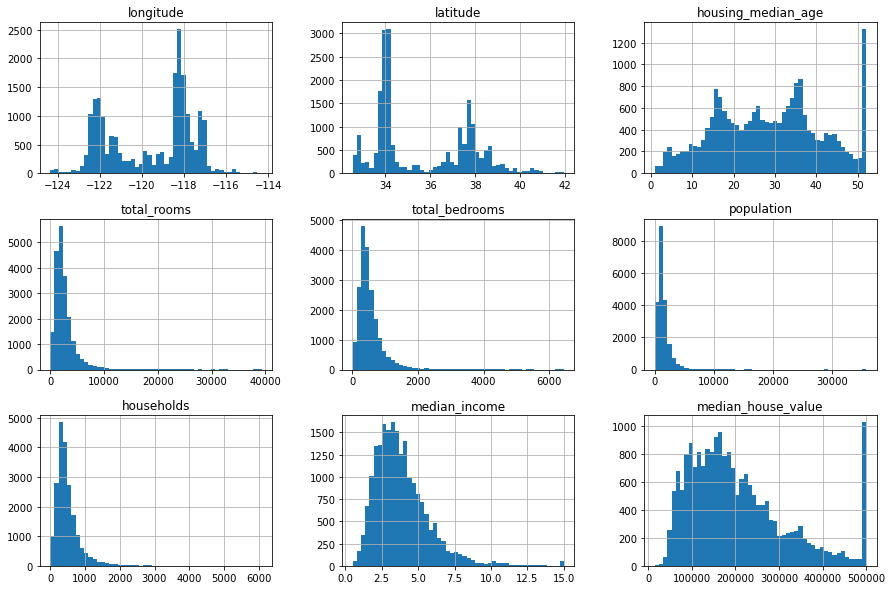

In [11]:
housing.hist(bins=50,figsize=(15,10))

### From above histograms it's clear that most of the features are skewed. It seems that 'housing_median_age' and 'median_house_value' have been capped at the end (Peak at the end).

## Getting test dataset
- Used Stratified sampling technique
- Defined a new feature income_cat which is income category and used if for sampling

In [12]:
housing['income_cat']=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [16]:
strat_train_set.to_csv("strat_train_set.csv",index=False)
strat_test_set.to_csv("strat_test_set.csv",index=False)

# Exploratory Data Analysis

In [17]:
data=pd.read_csv('strat_train_set.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   median_house_value  16512 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


Text(0.5, 1.0, 'Distribution of households')

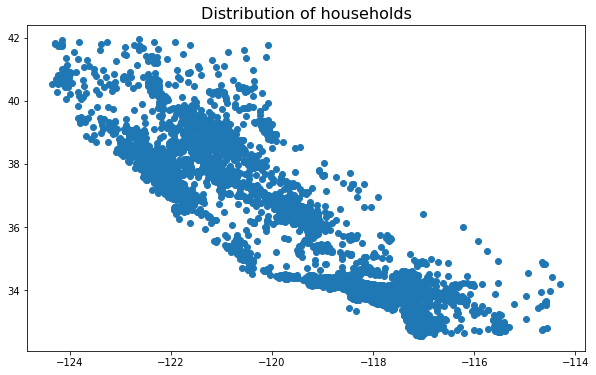

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.title("Distribution of households",size=16)

### By setting alpha=0.1, we can see high density areas

Text(0.5, 1.0, 'Distribution of households')

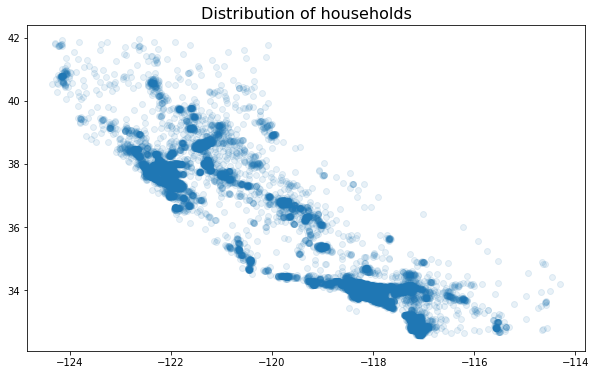

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

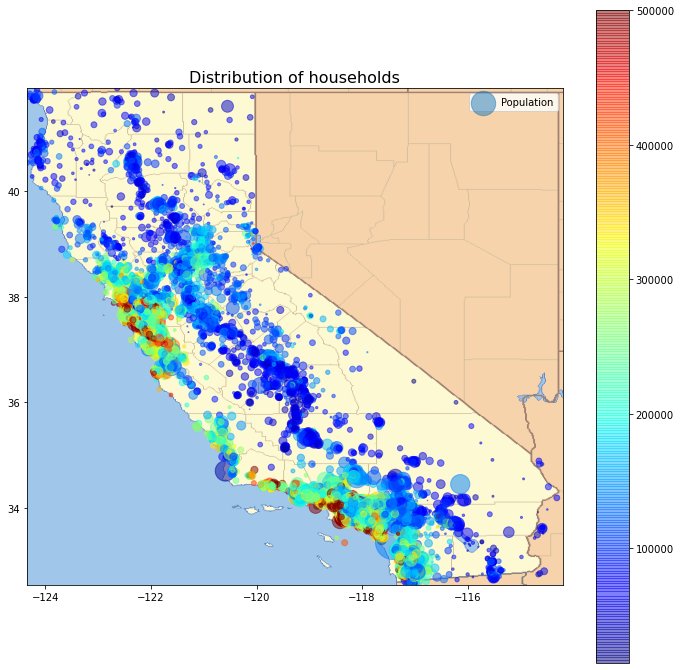

In [21]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,s=data['population']/30,c=data['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

### From above plot we can infer that,

- Housing prices are much related to location and population density.
- Housing prices near ocean are higher except in northern california.

Now, see the correlation of 'median house value' with other columns. This is Pearson's correlation coefficient.

In [22]:
corr_matrix=data.corr()

In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

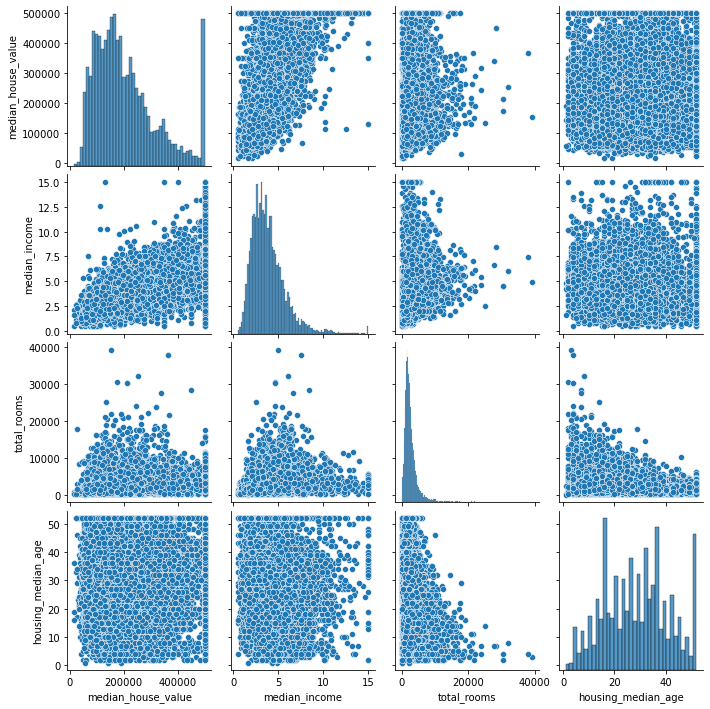

In [24]:
sns.pairplot(data[['median_house_value','median_income','total_rooms','housing_median_age']])

### Median Income is the most promising attribute to get Median Housing Price

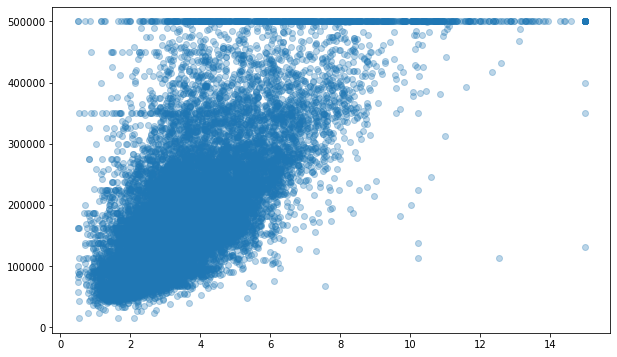

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(y=data['median_house_value'],x=data['median_income'],alpha=0.3)

### A clear line can be seen at 500k at which the data is capped. Similar lines can be seen around 450k,350k. This kind of data may degrade the performance of model.

### Creating new features:
- rooms per household
- bedrooms per room
- population per household

### Initially creating them on a copy of dataset and checing whether they are making any difference.

In [26]:
data1=data.copy()

In [27]:
data1['rooms_per_household']=data1['total_rooms']/data1['households']
data1['bedrooms_per_room']=data1['total_bedrooms']/data1['total_rooms']
data1['population_per_household']=data1['population']/data1['households']

In [28]:
data1.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.89,37.29,38,1568,351.0,710,339,2.7042,<1H OCEAN,286600,4.625369,0.223852,2.094395


In [29]:
corr_matrix=data1.corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### It is clear that 'rooms_per_household' and 'bedrooms_per_room' have better correlation with 'median_house_value' than 'total_rooms' and 'total_bedrooms'.

### I have created classes for individual data manupulation job so that I can add them into a pipeline

In [31]:
class FeaturesAdder(BaseEstimator,TransformerMixin):
    """This class adds new features in the dataset.
        Features added are : rooms_per_household, bedrooms_per_room, and population_per_household.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['rooms_per_household']=X['total_rooms']/X['households']
        X['bedrooms_per_room']=X['total_bedrooms']/X['total_rooms']
        X['population_per_household']=X['population']/X['households']
        return X

## Null Value Imputation

In [32]:
#Get number of Null Values
def get_null_count(data):
    for i in data.columns:
        print(i,': ',len(data[data[i].isnull()][i]))

In [33]:
get_null_count(data)

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  158
population :  0
households :  0
median_income :  0
ocean_proximity :  0
median_house_value :  0


In [34]:
data_null=data[data['total_bedrooms'].isnull()]

### Plotting null values to check for any patterns.

### For example: whether all nulls are concentrated in region or not

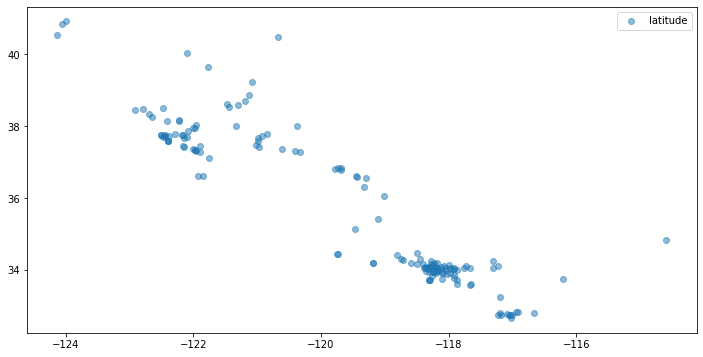

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(x=data_null['longitude'],y=data_null['latitude'],alpha=0.5, label='latitude')
plt.legend()

### There is not any specific pattern in null values except a dense spot near -118 longitude

### Then, plotted histograms of columns with null values.

array([[<AxesSubplot:title={'center':'bedrooms_per_room'}>]], dtype=object)

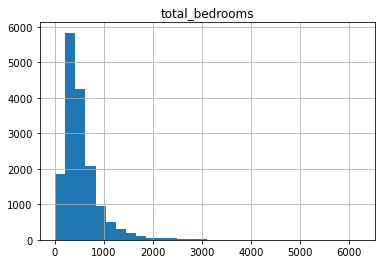

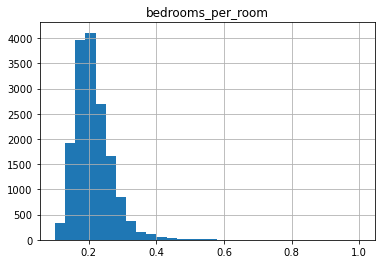

In [36]:
data1.hist(column='total_bedrooms',bins=30)
data1.hist(column='bedrooms_per_room',bins=30)

### As the distributions of 'total_bedrooms' and 'bedrooms_per_room' are skewed, it's better to replace null values by median. I have used sklearn's Imputer to do this job

## Removing outliers

In [37]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

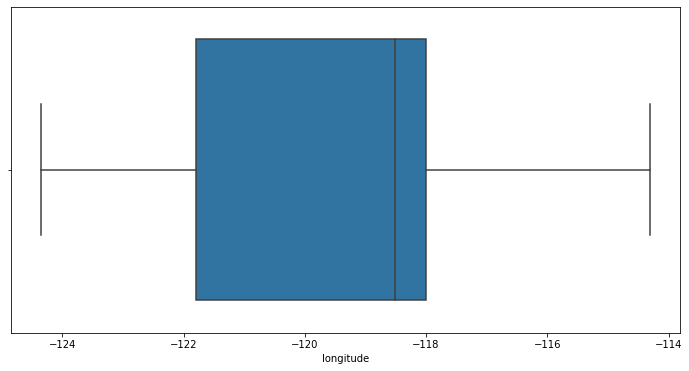

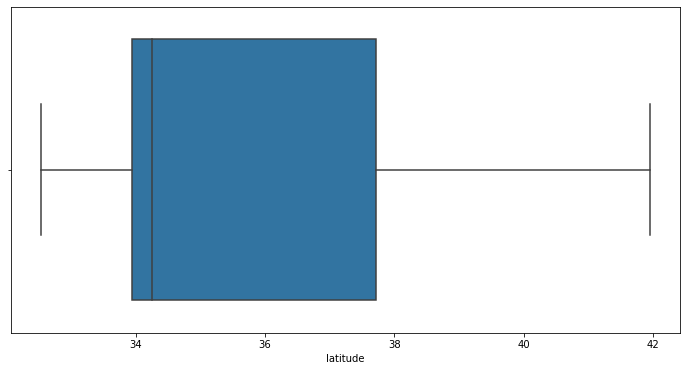

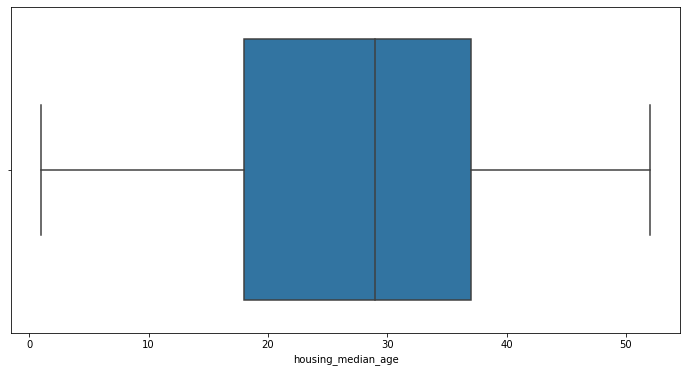

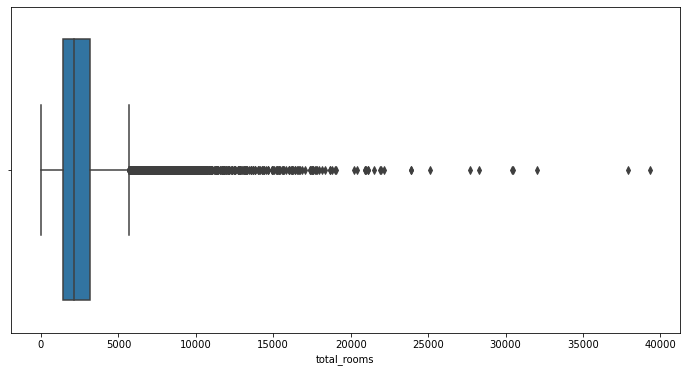

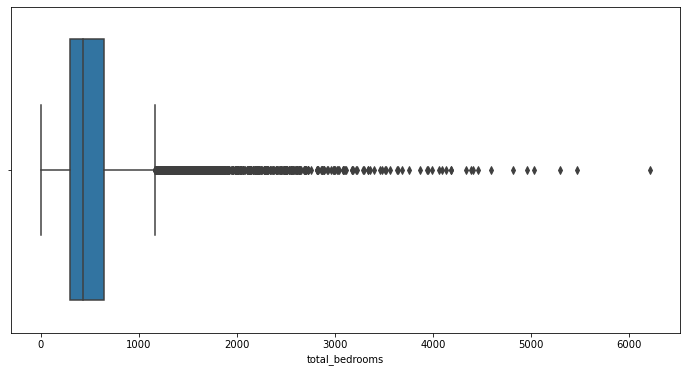

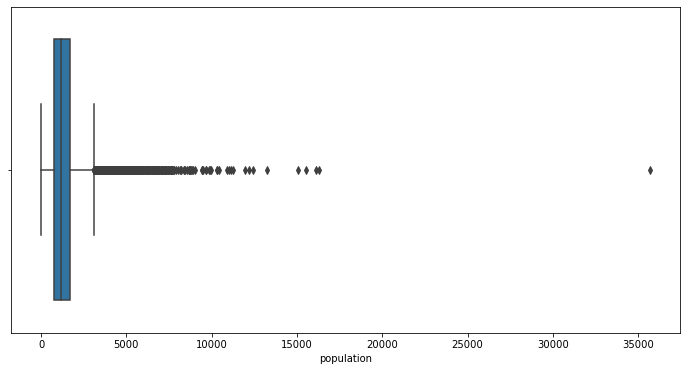

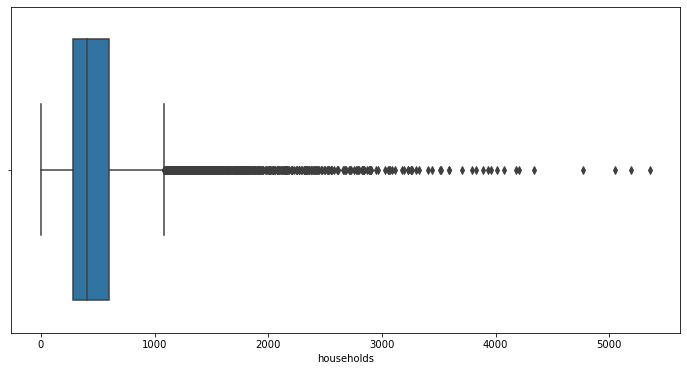

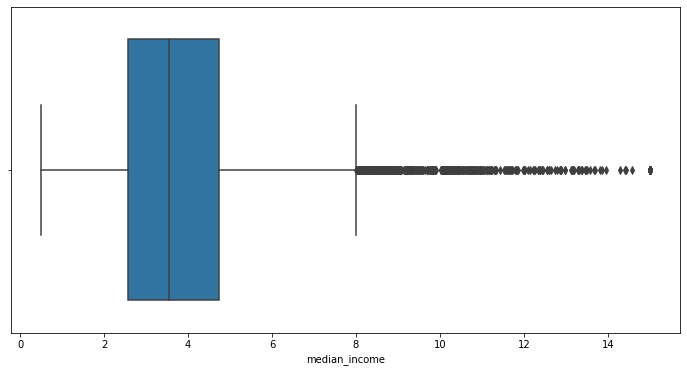

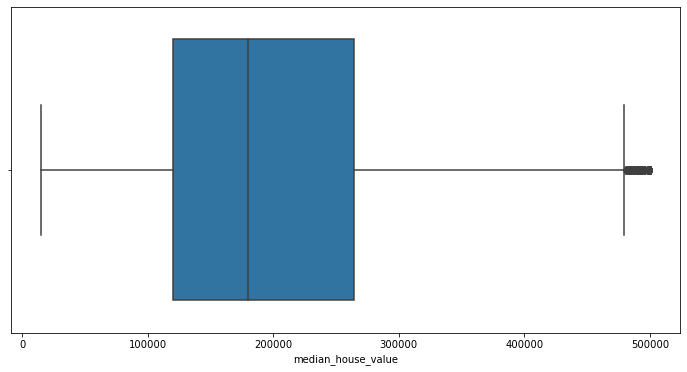

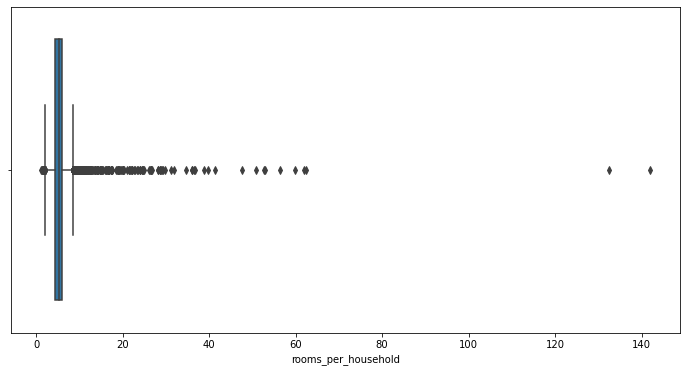

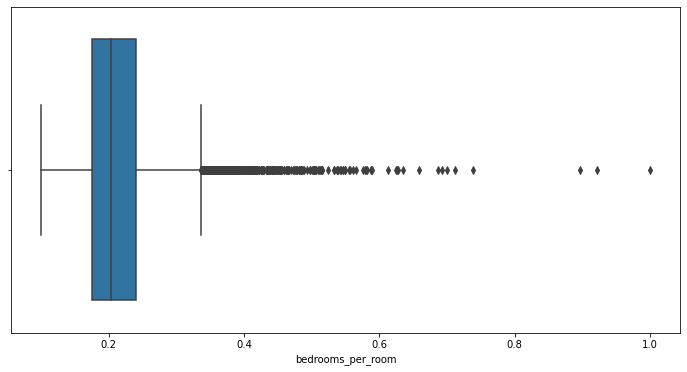

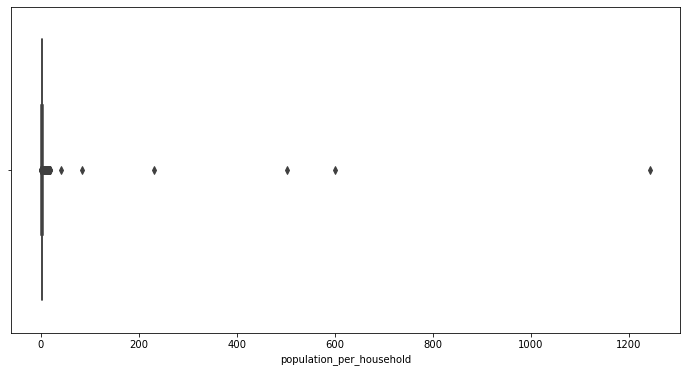

In [38]:
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    sns.boxplot(x=i,data=data1,ax=ax)

### By studying above box plots in details as well as scatter plot of 'Median_House_Value' vs. 'Median_Income', I decided following conditions to remove outliers.

In [39]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) | (X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X

In [40]:
data1=RemoveOutliers().fit_transform(data1)

In [41]:
data_labels=data1['median_house_value']
data1=data1.drop('median_house_value',axis=1)

## Transforming skewed features

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'rooms_per_household'}>],
       [<AxesSubplot:title={'center':'bedrooms_per_room'}>,
        <AxesSubplot:title={'center':'population_per_household'}>,
        <AxesSubplot:>]], dtype=object)

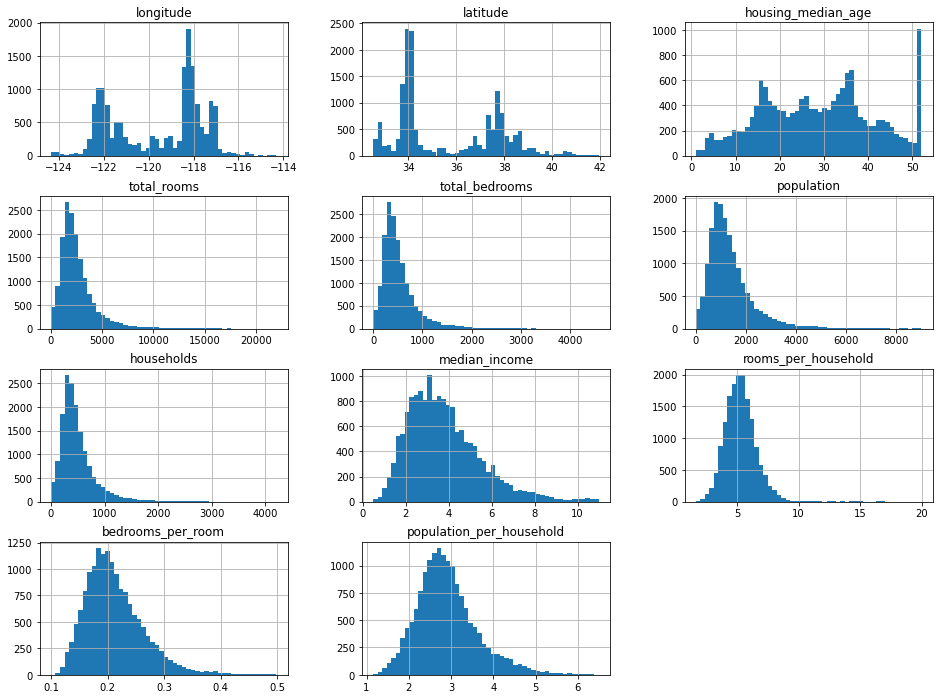

In [42]:
data1.hist(bins=50,figsize=(16,12))

In [43]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

## Get skewness of features

In [44]:
skewness=[]
for i in num_features:
    skewness.append(data1[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
total_rooms,2.902649
total_bedrooms,2.684070
households,2.629067
population,2.453927
rooms_per_household,2.168956
bedrooms_per_room,1.158469
median_income,1.051412
population_per_household,0.902046
latitude,0.462198
housing_median_age,0.061121


### I transformed features using log1p and boxcox1p functions.

### boxcox1p is used for highly skewed features

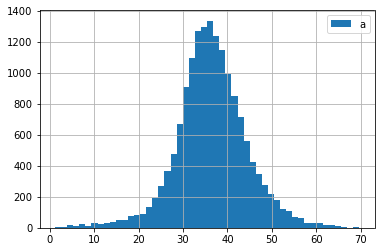

In [45]:
data1['households'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

In [46]:
class FeaturesTransformer(BaseEstimator,TransformerMixin):
    """This class trnsforms numberical featuress in the dataset.
    Note: Transformations are hard coded.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p        
        X['total_rooms']=X['total_rooms'].apply(lambda x: boxcox1p(x,0.25))
        X['total_bedrooms']=X['total_bedrooms'].apply(lambda x: boxcox1p(x,0.25))
        X['households']=X['households'].apply(lambda x: boxcox1p(x,0.2))
        X['population']=X['population'].apply(lambda x: boxcox1p(x,0.3))
        X['rooms_per_household']=X['rooms_per_household'].apply(lambda x: np.log1p(x)**0.5)
        X['bedrooms_per_room']=X['bedrooms_per_room'].apply(lambda x: np.log1p(x)**0.25)
        X['median_income']=X['median_income'].apply(lambda x: np.log1p(x)**1.25)
        X['population_per_household']=X['population_per_household'].apply(lambda x: np.log1p(x)**1)
        return X

In [47]:
data1=FeaturesTransformer().fit_transform(data1)

### Transformed features

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'rooms_per_household'}>],
       [<AxesSubplot:title={'center':'bedrooms_per_room'}>,
        <AxesSubplot:title={'center':'population_per_household'}>,
        <AxesSubplot:>]], dtype=object)

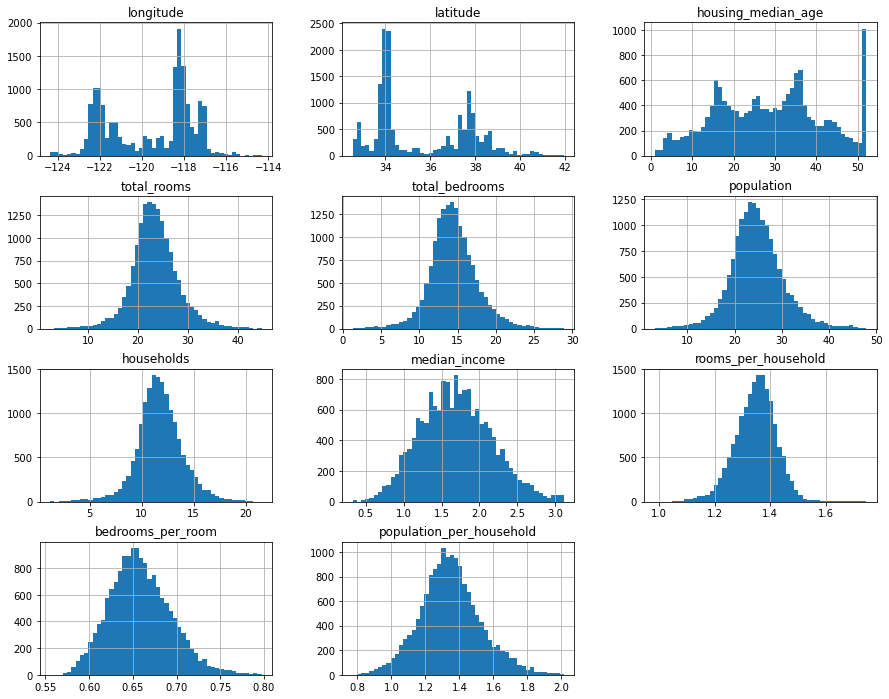

In [48]:
data1.hist(bins=50,figsize=(15,12))

### Getting dummy variables and Feature Scaling

In [49]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 

In [50]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [51]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    """This class is a dataframe selector.
        Data members:
            features: A list of column_names you want in output dataframe
    """
    def __init__(self,features):
        self.features=features
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.features]

In [52]:
class GetDummies(BaseEstimator,TransformerMixin):
    """This class is used to get dummy columns from categorical columns."""
    def fit (self,X,y=None):
        return self
    def transform(self,X,y=None):
        #change ISLAND to NEAR BAY...as count of ISLAND is very low
        X[X=='ISLAND']='NEAR BAY'
        return (pd.get_dummies(X,drop_first=True))

In [53]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household','bedrooms_per_room', 'population_per_household']
cat_featues=['ocean_proximity']

In [54]:
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_features)),
    ('imputer',SimpleImputer(strategy='mean')),
    ('std_scaler',StandardScaler())
])

#Preparing categorical data
cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_featues)),
    ('get_dummies',GetDummies())
])

#Combining numerical and categorica data
data_cleaning_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
    
])

In [55]:
data1=data_cleaning_pipeline.fit_transform(data1)

### Above pipeline returned an array. I converted it to dataframe again so that we can look at colums easily and do furthur processing.

In [56]:
l=num_features.copy()
l.extend([0,1,2])

In [57]:
data1=pd.DataFrame(data1,columns=l)

In [58]:
data1.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,0,1,2
0,-1.154224,0.772567,0.746370,-0.475425,-0.369225,-0.743301,-0.314063,-0.611150,-0.449849,0.334068,-1.207634,0.0,0.0,0.0
1,-1.174180,0.660361,-1.171019,-1.491029,-1.797235,-1.693043,-1.732155,1.464804,0.622682,-1.106072,-0.204224,0.0,0.0,0.0


### Scaling labels

### This is necessary for some machine learning algorithms

In [59]:
y=data_labels.copy()

In [60]:
label_scaler=StandardScaler()
data_labels=label_scaler.fit_transform(y.values.reshape(-1,1))

### Check for multicoliniearity
### Here I have removed features having VIF (Variance Inflation Factor) greater than 5 and p-Values greater than 0.05 I have written following functions to do the job

In [61]:
def get_vif(X):
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return pd.Series(index=X.columns,data=l).sort_values(ascending=False)
            
def remove_by_pvalue(X,y,pvalue=0.05):
    """Remove features with p-value more than 'pvalue'
    
    This function uses statsmodels.api.OLS model. Please add intercept to data externally.
    Input:
        X: Array or dataframe excluding predicted variable
        y: Series or list of predicted variable
        pvalue: int or float
    
    Note:
        X is changed inplace
    """
    import statsmodels.api as sm
    for i in range(len(X.columns)):
        regressor_OLS=sm.OLS(endog=y,exog=X).fit()
        s=regressor_OLS.pvalues.sort_values(ascending=False)
        if s.iloc[0]>pvalue:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],'P-value: ',s.iloc[0])
            
def remove_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
        
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break      

In [62]:
# Get VIFs of all features
get_vif(data1)

total_bedrooms              558.923558
households                  389.655010
total_rooms                 287.321351
population                  141.389762
bedrooms_per_room            66.260643
rooms_per_household          50.549888
population_per_household     19.548814
latitude                     18.347840
longitude                    17.347168
median_income                 3.027807
0                             2.022556
1                             1.449785
housing_median_age            1.374288
2                             1.223067
dtype: float64

In [63]:
remove_by_vif(data1)

Removed:  total_bedrooms , VIF:  558.9235579608114
Removed:  households , VIF:  228.1741365426593
Removed:  total_rooms , VIF:  108.34813434774779
Removed:  latitude , VIF:  18.337136881413034
Removed:  bedrooms_per_room , VIF:  5.618818797870981


### So, above 5 colums were removed because of VIF constraint

In [64]:
remove_by_pvalue(data1,data_labels)

### No columns were removed by p-Value constraint

### This is all the data manupulation I have done. Following is the summarization:

- Adding new featues
- Removing outliers
- Transforming skewed features
- Null value imputation
- Dummy variables for ocean_proximity
- Check for multicoloniearity
- Standard scaling

# SECOND PORTION : Training machine learning algorithms

I will try to find the best suitable machine learning model to predict house prices.

## Making Train Data Ready

In [65]:
df=pd.read_csv('strat_train_set.csv')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   median_house_value  16512 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


In [67]:
#Adding features
df=FeaturesAdder().fit_transform(df)

num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

#Removing outliers
df=RemoveOutliers().fit_transform(df)

data_labels=df['median_house_value']
df=df.drop('median_house_value',axis=1)

#Transforming features
df=FeaturesTransformer().fit_transform(df)

num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household','bedrooms_per_room', 'population_per_household']
cat_featues=['ocean_proximity']

#Mean value imputation, feature scaling, gettin gdummy variables
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_features)),
    ('imputer',SimpleImputer(strategy='mean')),
    ('std_scaler',StandardScaler())
])

cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_featues)),
    ('get_dummies',GetDummies())
])

#Combining numerical and categorica data
data_cleaning_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),  
])

df=data_cleaning_pipeline.fit_transform(df)

l=num_features.copy()
l.extend([0,1,2])
df=pd.DataFrame(df,columns=l)

#Check for multicoliniearity
remove_by_vif(df)
remove_by_pvalue(df,data_labels)

data_prepared=df
y_train=data_labels.copy()

label_scaler=StandardScaler()
data_labels=label_scaler.fit_transform(y_train.values.reshape(-1,1))

Removed:  total_bedrooms , VIF:  558.9235579608114
Removed:  households , VIF:  228.1741365426593
Removed:  total_rooms , VIF:  108.34813434774779
Removed:  latitude , VIF:  18.337136881413034
Removed:  bedrooms_per_room , VIF:  5.618818797870981


In [68]:
data_prepared

,longitude,housing_median_age,population,median_income,rooms_per_household,population_per_household,0,1,2
0,-1.154224,0.746370,-0.743301,-0.611150,-0.449849,-1.207634,0.0,0.0,0.0
1,-1.174180,-1.171019,-1.693043,1.464804,0.622682,-0.204224,0.0,0.0,0.0
2,1.185638,0.187132,-0.375164,-0.492940,-0.825039,-1.331664,0.0,0.0,1.0
3,-0.016721,-0.292216,0.285178,-1.299468,0.057913,1.602935,1.0,0.0,0.0
4,0.492161,-0.931346,2.390008,-0.368150,-0.558206,0.282264,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
16000,0.721657,1.385500,-1.008524,0.771706,0.651982,-0.173482,1.0,0.0,0.0
16001,1.006033,0.906153,-0.210085,-1.132569,-0.440662,1.539436,1.0,0.0,0.0
16002,1.584762,-1.570475,0.892959,-0.203348,0.844114,-0.152823,1.0,0.0,0.0
16003,0.781526,0.187132,0.169212,0.294852,0.266387,1.238031,0.0,0.0,0.0


In [69]:
data_prepared.describe()

,longitude,housing_median_age,population,median_income,rooms_per_household,population_per_household,0,1,2
count,1.600500e+04,1.600500e+04,1.600500e+04,1.600500e+04,1.600500e+04,1.600500e+04,16005.000000,16005.000000,16005.000000
mean,2.320016e-15,1.304382e-16,5.637521e-16,1.228842e-16,5.576989e-16,-8.838776e-17,0.319838,0.112277,0.128022
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,0.466428,0.315717,0.334125
min,-2.381529e+00,-2.209605e+00,-3.858035e+00,-2.883611e+00,-4.797942e+00,-3.198401e+00,0.000000,0.000000,0.000000
25%,-1.109322e+00,-8.514543e-01,-6.030186e-01,-7.133766e-01,-6.151884e-01,-6.358845e-01,0.000000,0.000000,0.000000
50%,5.320735e-01,2.734921e-02,-5.728918e-02,-2.813425e-02,5.124493e-02,-4.460040e-02,0.000000,0.000000,0.000000
75%,7.815258e-01,6.664790e-01,5.488315e-01,6.611860e-01,6.324853e-01,5.870352e-01,1.000000,0.000000,0.000000
max,2.627473e+00,1.864848e+00,4.123765e+00,3.009781e+00,5.234390e+00,3.701446e+00,1.000000,1.000000,1.000000


In [70]:
data_prepared.isnull().sum()

longitude                   0
housing_median_age          0
population                  0
median_income               0
rooms_per_household         0
population_per_household    0
0                           0
1                           0
2                           0
dtype: int64

## Choosing ML Algorithm

In [71]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split
from sklearn.model_selection import GridSearchCV

In [72]:
def plot_validation_curve(scores,param_range,param_name,scoring='r2'):
    """This function plot validation curve.
    
    Parameters:
        scores: scores obtained from validation_curve() method
        param_range: list of range of parameters passed as 'param_range' in validation_curve() method
        scoring: str
    """
    n=len(param_range)
    if scoring=='r2':
        train_score=[scores[0][i].mean() for i in range (0,n)]
        test_score=[scores[1][i].mean() for i in range (0,n)]
    elif scoring=='neg_mean_squared_error':
        train_score=[np.sqrt(-scores[0][i].mean()) for i in range (0,n)]
        test_score=[np.sqrt(-scores[1][i].mean()) for i in range (0,n)]

    fig=plt.figure(figsize=(8,6))
    plt.plot(param_range,train_score,label='Train')
    plt.plot(param_range,test_score,label='Test')
    plt.xticks=param_range
    plt.title("Validation curve of {}".format(param_name),size=12)
    plt.legend()

## Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression,Ridge

In [74]:
lr=LinearRegression()
scores=cross_val_score(lr,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7991862993882449


### To calculate RMSE I have used 'train_y' which are unscaled labels.

In [75]:
lr=LinearRegression()
scores=cross_val_score(lr,data_prepared,y_train,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

RMSE:  67960.78780025143


### So with linear regression,

- R-squared=0.8

- RMSE=67960.78

- RMSE of above model is 67960 which means that there's an average error of $67960 in prediction of house price.

## Ridge Regression

In [76]:
ridge=Ridge(alpha=0.1,random_state=42)
scores=cross_val_score(ridge,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7991863159569764


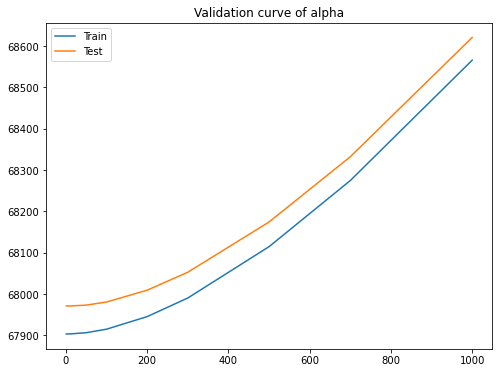

In [77]:
ridge=Ridge(random_state=42)
param_name='alpha'
param_range = [1,10,50,100,200,300,500,700,1000]

scoring='neg_mean_squared_error'
curve=validation_curve(ridge,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)

n=len(param_range)
'''if scoring=='r2':
    train_score=[curve[0][i].mean() for i in range (0,n)]
    test_score=[curve[1][i].mean() for i in range (0,n)]
elif scoring=='neg_mean_squared_error':
    train_score=[np.sqrt(-curve[0][i].mean()) for i in range (0,n)]
    test_score=[np.sqrt(-curve[1][i].mean()) for i in range (0,n)]
    '''

plot_validation_curve(curve,param_range,param_name,scoring)

### From above plot It can be seen that Train and Test scores are almost after alpha=700.

### Even at alpha=0, difference between RMSE is not much, so there is no objectionable overfitting. As alpha is increased, bias is increasing and so the RMSE.

### As linear regression is not overfitting the model, using Ridge regression is not necessary.

## Support Vector Regression
- I have used this to use kernel trick with support vector machines and for polynomial features using RBF kernel.

In [78]:
from sklearn.svm import SVR

In [79]:
svr=SVR(degree=2)
param_grid={
    'C':[1,10,50,100]
}
scoring='r2'
grid=GridSearchCV(svr,param_grid,scoring=scoring,n_jobs=-1,cv=3,verbose=3)
grid.fit(data_prepared,data_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  4.4min remaining:   53.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  5.5min finished


GridSearchCV(cv=3, estimator=SVR(degree=2), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100]}, scoring='r2', verbose=3)

In [80]:
print(grid.best_params_)

{'C': 10}


In [81]:
svr=SVR(degree=2,C=10)
scores=cross_val_score(svr,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.8787045011060872


### So, with support vector machines

### R2=0.878

### which is better than Linear Regression model

## Decision Tree

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
dtr=DecisionTreeRegressor(random_state=42)
scores=cross_val_score(dtr,data_prepared,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7571871948332872


### So, basic decision tree model is giving

### R2=0.7571

### Then I did some parameter tuning so get best decision tree model.

## max_depth

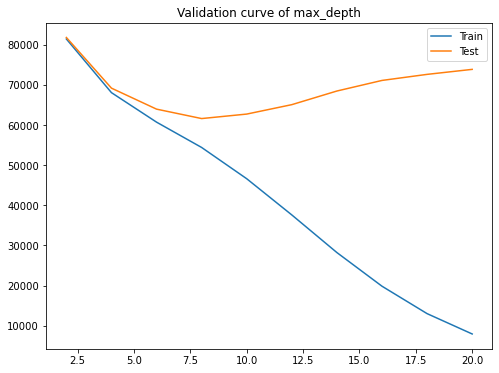

In [84]:
dtr=DecisionTreeRegressor(random_state=42)
param_name='max_depth'
param_range = range(2,21,2)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)

plot_validation_curve(curve,param_range,param_name,scoring)

### From above diagram it is clear that model starts overfitting heavily after max_depth=8

### max_depth: 3 to 8

## max_features

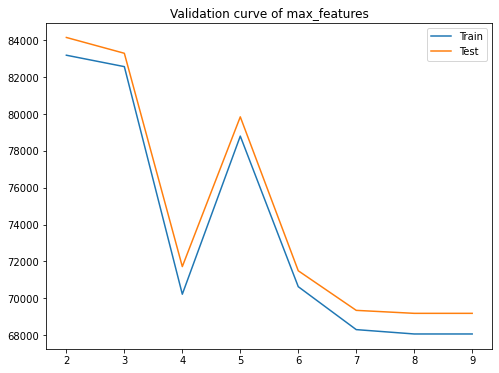

In [85]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=42)
param_name='max_features'
param_range = range(2,10)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

### max_features: 6 to 9

## min_samples_split

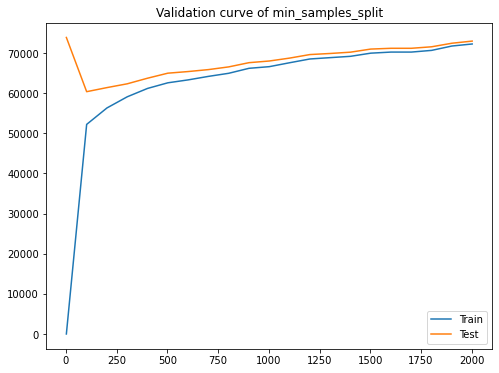

In [86]:
dtr=DecisionTreeRegressor(random_state=42)
param_name='min_samples_split'
param_range = range(2,2003,100)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

### With incresing min_samples_split after 200, variance is reducing

## min_samples_leaf

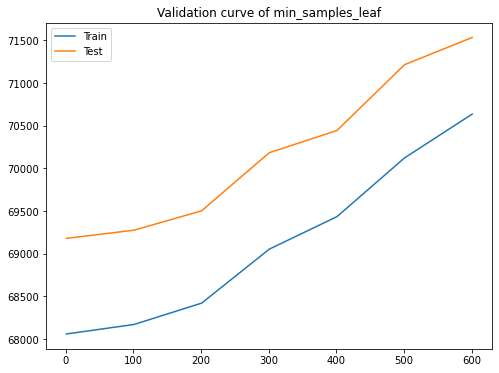

In [87]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=42)
param_name='min_samples_leaf'
param_range = range(1,701,100)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

### Increasing min_samples_leaf is neither giving good results nor helping to reduce overfitting.

### Gradient Boosting Regression
- I used this ensembling method to get the best model from decision trees.

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
gbr=GradientBoostingRegressor(random_state=42)
param_grid={
    'n_estimators':[100,500,1000],
    'max_depth':range(3,9,1),
    'max_features':[6,7,9],
    'min_samples_split':[200,400]  
}
scoring='r2'
grid=GridSearchCV(gbr,param_grid,scoring=scoring,n_jobs=-1,cv=3,verbose=1)
grid.fit(data_prepared,y_train)
print(grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 34.0min finished


{'max_depth': 8, 'max_features': 6, 'min_samples_split': 200, 'n_estimators': 100}


## Check for n_estimators

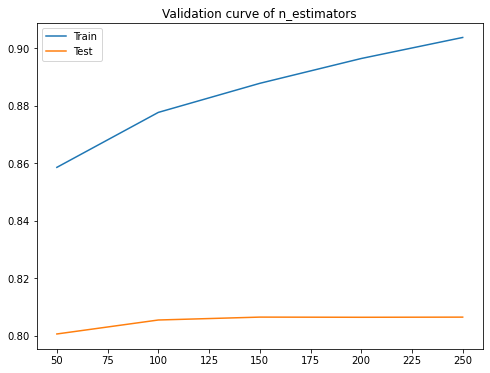

In [90]:
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200,random_state=42)
param_name='n_estimators'
param_range = range(50,251,50)
scoring='r2'
curve=validation_curve(gbr,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

### With increasing number of estimators, model is overfitting. With lower number of estimators, model is underfitting.

### I chose n_estimators=100

In [91]:
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)
scores=cross_val_score(gbr,data_prepared,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.8974790145435815


### With above GradientBosting model

### R2=0.897

### This model is even better than support vector regressor.

## Stacking
- This is another ensembling method.

- In this, I have used Linear regression and Gradient boosing regression as base models and Support Vector Regression as meta model.

In [92]:
from mlxtend.regressor import StackingRegressor

In [93]:
lr=LinearRegression()
svr=SVR(degree=2,C=10)
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)

In [94]:
sr=StackingRegressor([lr,gbr],svr,verbose=3)
scores=cross_val_score(sr,data_prepared,data_labels,n_jobs=-1,cv=3,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.8920759836217309


### For stacking,

- R2=0.892

- This is less than Gradient Boosting Regressor.

## Final Model:

### I finalized following Gradient Boosing Regressor with following parameters:

- n_estimators=100
- max_depth=8
- max_features=6
- min_samples_split=200

## Learning Curve

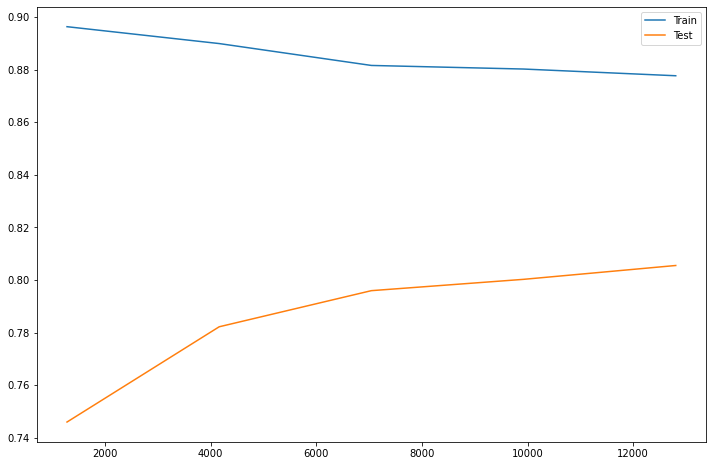

In [95]:
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)
lc=learning_curve(gbr,data_prepared,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score,label='Train')
plt.plot(size,test_score,label="Test")
plt.legend()

### From learning curve it is clear that this model is still overfitting. But, with the increase in number of samples, variance is decreasing.

### So, getting more training data can be a solution for overfitting.

## Predicting on Test Set

In [96]:
test_data=pd.read_csv('strat_test_set.csv')
test_data_labels=test_data['median_house_value'].copy()
test_data.drop('median_house_value',axis=1,inplace=True)

### I did following data manupulations on test data

- Adding features
- Transforming skewed features

In [97]:
fa=FeaturesAdder()
df_test=fa.fit_transform(test_data)

df_test=FeaturesTransformer().fit_transform(df_test)

#used 'transform' method, as I don't want to refit the standard scalar on test data.
df_test=data_cleaning_pipeline.transform(df_test)

df_test=pd.DataFrame(df_test,columns=l)

### Scaling test data labels

In [98]:
#used 'transform' method, as I don't want to refit the standard scalar on test data.

y_test=test_data_labels.copy()
test_data_labels=label_scaler.transform(y_test.values.reshape(-1,1))

### Choosing same columns of test_data as of train_data

In [99]:
test_data_prepared=df_test[data_prepared.columns]

In [100]:
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)
gbr.fit(data_prepared,data_labels)
train_pred=gbr.predict(data_prepared)
test_pred=gbr.predict(test_data_prepared)

In [101]:
mse=mean_squared_error(y_train,label_scaler.inverse_transform(train_pred))
rmse=np.sqrt(mse)
print('train error:',rmse)
mse=mean_squared_error(y_test,label_scaler.inverse_transform(test_pred))
rmse=np.sqrt(mse)
print('test eroor:',rmse)

train error: 39773.94783299169
test eroor: 49795.96894045239
